<a href="https://colab.research.google.com/github/ricardorocha86/Python-para-Machine-Learning/blob/master/Exerc%C3%ADcios/Exerc%C3%ADcio_4_Python_para_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercício 4**

Fazer um programa para simular um **álbum de figurinhas**.

### EXEMPLO: **Álbum Premier League 2019-2020**
1. Total de cromos: **636**
2. Preço do livro ilustrado capa brochura: **R\$ 8,90**
3. Envelope com 5 cromos: **R\$ 2,50**

### SUPOSIÇÕES
1. Todas as figurinhas tem igual probabilidade de serem sorteradas
2. Um pacotinho é comprado por vez  

### ALGORITMO
1. Comprar um pacotinho de figurinhas (5 figurinhas cada, que podem ser repetidas);
2. Colar no álbum e verificar se o álbum está completo;
3. Caso esteja incompleto, comprar mais um pacotinho, caso contrário, terminar.

### PERGUNTAS
1. Qual o valor médio investido para completar o álbum nessas condições?
2. Quantos pacotes são necessários comprar, em média, para completar o álbum?
3. Qual é a distribuição empírica do valor investido para completar o álbum?
4. Quantas vezes saiu a figurinha mais repetida, em média?
5. Em média, quantas figurinhas não se repetem ao completar o álbum?
6. Qual a probabilidade de se gastar mais que R\$3000,00 para completar o álbum?
7. Qual a probabilidade de se gastar menos que R\$1500,00 para completar o álbum?
8. Qual a probabilidade de se gastar mais do que a média para completar o álbum?
9. Qual é o intervalo de confiança de 95% para o gasto ao se completar o álbum?
10. Qual o valor médio gasto caso se esteja completando o álbum com mais um amigo?
11. Quanto se economiza ao utilizar o cenário da questão 10?
12. Qual o valor médio gasto caso se esteja completando o álbum com mais dois amigos?
13. Quanto se economiza ao utilizar o cenário da questão 12?

In [ ]:
n_album = 636
preco_pacote = 2.50
preco_album = 8.90
simulacoes = 1000

In [ ]:
import numpy as np

In [ ]:
# comprando figurinhas até completar o álbum
def SimulaAlbum():
    album = np.zeros(n_album) 
    pacotes = 0
    while not np.all(album > 0):
        pacotinho = np.random.choice(range(n_album), 5)
        pacotes += 1

        for i in pacotinho:
            album[i] += 1
 

    valor_gasto = preco_album + preco_pacote * pacotes 

    mais_repetida = max(album)

    nao_repetidas = sum(album == 1)

    # print(album)
    return valor_gasto, mais_repetida, nao_repetidas

SimulaAlbum()

(2311.4, 16.0, 3)

In [ ]:
valores = []
maisrep = []
nao_rep = []

for i in range(simulacoes):

    s1, s2, s3 = SimulaAlbum()

    valores.append(s1)
    maisrep.append(s2)
    nao_rep.append(s3)

    if (i+1) % 100 == 0:
        print('Simulação:', i+1, '/', simulacoes)

Simulação: 100 / 1000
Simulação: 200 / 1000
Simulação: 300 / 1000
Simulação: 400 / 1000
Simulação: 500 / 1000
Simulação: 600 / 1000
Simulação: 700 / 1000
Simulação: 800 / 1000
Simulação: 900 / 1000
Simulação: 1000 / 1000


Respostas das perguntas 1 e 2, respecitvamente:

In [ ]:
print('O valor médio aproximado gasto foi:', round(np.mean(valores), 2))
print('O numero de pacotes médio aproximado foi:', round((np.mean(valores) - preco_album)/preco_pacote, 2))

O valor médio aproximado gasto foi: 2254.85
O numero de pacotes médio aproximado foi: 898.38


Resposta da pergunta 3:

Podemos visualizar a distribuição empírica do valor gasto através do **histograma** dos valores simulados.

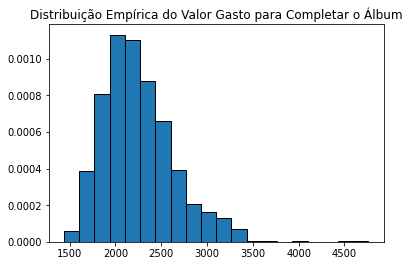

In [ ]:
import matplotlib.pyplot as plt

plt.hist(valores, bins = 20, density = True, edgecolor = 'black')
plt.title('Distribuição Empírica do Valor Gasto para Completar o Álbum')
plt.show()

4. Quantas vezes saiu a figurinha mais repetida, em média?

In [ ]:
np.mean(maisrep)

16.634

5. Em média, quantas figurinhas não se repetem ao completar o álbum?


In [ ]:
np.mean(nao_rep)

6.825

6. Qual a probabilidade de se gastar mais que R\$3000,00 para completar o álbum?


In [ ]:
(np.array(valores) > 3000).mean()

0.055

7. Qual a probabilidade de se gastar menos que R\$1500,00 para completar o álbum?


In [ ]:
(np.array(valores) < 1500).mean()

0.002

8. Qual a probabilidade de se gastar mais do que a média para completar o álbum?


In [ ]:
(np.array(valores) > np.mean(valores)).mean()

0.429

9. Qual é o intervalo de confiança de 95% para o gasto ao se completar o álbum?


In [ ]:
np.quantile(valores, [0.025, 0.975])

array([1678.8375, 3181.7125])

10. Qual o valor médio gasto caso se esteja completando o álbum com mais um amigo?


In [ ]:
def SimulaAlbum2(n_amigos):
    album = np.zeros(n_album) 
    pacotes = 0
    while not np.all(album > n_amigos):
        pacotinho = np.random.choice(range(n_album), 5)
        pacotes += 1

        for i in pacotinho:
            album[i] += 1
 

    valor_gasto = preco_album + preco_pacote * pacotes 
 
    return valor_gasto

In [ ]:
valores2 = []

for i in range(simulacoes):

    valores2.append(SimulaAlbum2(n_amigos = 1))

    if (i+1) % 100 == 0:
        print('Simulação:', i+1, '/', simulacoes)

Simulação: 100 / 1000
Simulação: 200 / 1000
Simulação: 300 / 1000
Simulação: 400 / 1000
Simulação: 500 / 1000
Simulação: 600 / 1000
Simulação: 700 / 1000
Simulação: 800 / 1000
Simulação: 900 / 1000
Simulação: 1000 / 1000


In [ ]:
valor2 = np.mean(valores2)/2
print(valor2)

1487.7200000000005


11. Quanto se economiza ao utilizar o cenário da questão 10?


In [ ]:
1 - valor2/np.mean(valores)

0.3402118549168568

12. Qual o valor médio gasto caso se esteja completando o álbum com mais dois amigos?


In [ ]:
valores3 = []

for i in range(simulacoes):

    valores3.append(SimulaAlbum2(n_amigos = 2))

    if (i+1) % 100 == 0:
        print('Simulação:', i+1, '/', simulacoes)

Simulação: 100 / 1000
Simulação: 200 / 1000
Simulação: 300 / 1000
Simulação: 400 / 1000
Simulação: 500 / 1000
Simulação: 600 / 1000
Simulação: 700 / 1000
Simulação: 800 / 1000
Simulação: 900 / 1000
Simulação: 1000 / 1000


In [ ]:
valor3 = np.mean(valores3)/3
valor3

1208.8175000000003

13. Quanto se economiza ao utilizar o cenário da questão 12?

In [ ]:
1 - valor3/np.mean(valores)

0.4639021750940753

Bônus: E se fossem um grupo de 10 pessoas, como ficaria?

In [ ]:
valores10 = []

for i in range(simulacoes):

    valores10.append(SimulaAlbum2(n_amigos = 9))

    if (i+1) % 100 == 0:
        print('Simulação:', i+1, '/', simulacoes)

Simulação: 100 / 1000
Simulação: 200 / 1000
Simulação: 300 / 1000
Simulação: 400 / 1000
Simulação: 500 / 1000
Simulação: 600 / 1000
Simulação: 700 / 1000
Simulação: 800 / 1000
Simulação: 900 / 1000
Simulação: 1000 / 1000


In [ ]:
valor10 = np.mean(valores10)/10
valor10

728.6354999999998

In [ ]:
1 - valor10/np.mean(valores)

0.6768578328000374